In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

#To plot
import seaborn as sns
import matplotlib.pyplot as plt

#To split 
from sklearn.model_selection import train_test_split

#For the accuracy 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [50]:
#Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Data processing

In [51]:
#Display the first 5 rows of the data 
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
#To get the matrix of the data
#train_data.shape()
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [53]:
#Description of the data 
train_data.describe()
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [54]:
#Check if there is missing data 
#Output is the sum of all the missing data in every coloumn 
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Cabin and Embarked have missing data

In [55]:
known_ages = train_data[train_data['Age'].notnull()]
unknown_ages = train_data[train_data['Age'].isnull()]

#use Linear interpolation to fill the missing ages 
#Linear interpolation estimate missing age based on previous ages
train_data['Age'].interpolate(method='linear', inplace=True)
##########################################################################
#did the same to the test data 
known_ages_test = test_data[test_data['Age'].notnull()]
unknown_ages_test = test_data[test_data['Age'].isnull()]

#use Linear interpolation to fill the missing ages 
#Linear interpolation estimate missing age based on previous ages
test_data['Age'].interpolate(method='linear', inplace=True)

In [56]:
#check if the age data is still null/missing
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Filled all the ages, need to fill Cabin

In [57]:
#Sex/Geneder is categorical data so represent it in 0,1
train_data['Sex']=train_data["Sex"].map({'female':1,'male':0})
######
#Sex/Geneder is categorical data so represent it in 0,1
test_data['Sex']=test_data["Sex"].map({'female':1,'male':0})

Fill all missing data from fare

In [58]:
#There is one null value in fare will add the mean 
fare_mean = test_data['Fare'].mean()

# Fill missing values in the "Fare" column with the mean
test_data['Fare'] = test_data['Fare'].fillna(fare_mean)

Worked on categorial data #1

In [59]:
#To help predict the cabin we need to modify another categorical column 
#The Ticket as every A/5-> 1 , PC->2, STON/O2->3, Other ->4
#Can modify by writing function to handle this case
#tickets = train_data['Ticket'].str.upper()

def label_ticket(tickets):
    if 'A/5'in tickets:
        return 1
    elif 'PC' in tickets:
        return 2
    elif 'STON/O2.' in tickets:
        return 3
    else: 
        return 4
    

#To map 
train_data['Ticket']= train_data['Ticket'].str.upper()
train_data['Ticket']= train_data['Ticket'].apply(label_ticket)
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,2,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,4,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,4,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,44.5,0,0,4,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,4,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,4,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,4,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,4,30.0708,NaN,C


In [60]:
#Did the same to test data

def label_ticket_test(tickets):
    if 'A/5'in tickets:
        return 1
    elif 'PC' in tickets:
        return 2
    elif 'STON/O2.' in tickets:
        return 3
    else: 
        return 4
    

#To map 
test_data['Ticket']= test_data['Ticket'].str.upper()
test_data['Ticket']= test_data['Ticket'].apply(label_ticket_test)
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,4,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,4,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,4,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,4,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,4,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,4,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,4,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,4,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,4,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,4,24.1500,NaN,S


Now work with predicting the null/missing values from the Cabin column

Will use linear regression to predict the missing cabins based on the Pclass, Ticket and Fare

In [61]:
known_cabins = train_data[train_data['Cabin'].notnull()]
unknown_cabins = train_data[train_data['Cabin'].isnull()]
#	Exclude the feature that is not needed for the logistic regression 	
features= ['Fare', 'Pclass']
LR_Model = LogisticRegression()
LR_Model.fit(known_cabins[features], known_cabins['Cabin'])
predicted_cabin = LR_Model.predict(unknown_cabins[features])
train_data.loc[train_data['Cabin'].isnull(),'Cabin'] = predicted_cabin

c:\Users\Andre Yanny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#train_data = pd.get_dummies(train_data,columns=['Cabin'],drop_first=True)
train_data['Cabin']= train_data['Cabin'].astype('category')
train_data['Embarked']=train_data['Embarked'].astype('category')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    int64   
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 77.7+ KB


Check if there is null/missing values in the cabin

In [63]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [64]:
missing_data_rows = train_data[train_data.isnull().any(axis=1)]
missing_data_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,4,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,4,80.0,B28,NaN


Used logistic regression to predict the missing values from for embarked 

In [65]:
#train_data.head(50)
known_Embarked = train_data[train_data['Embarked'].notnull()]
unknown_Embarked = train_data[train_data['Embarked'].isnull()]
#	Exclude the feature that is not needed for the logistic regression 	
features= ['Fare', 'Pclass']
LR_Model_1 = LogisticRegression()
LR_Model_1.fit(known_Embarked[features], known_Embarked['Embarked'])
predicted_Embarked = LR_Model_1.predict(unknown_Embarked[features])
train_data.loc[train_data['Embarked'].isnull(),'Embarked'] = predicted_Embarked

train_data.head(62)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,2,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,4,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,4,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,0,3,"Novel, Mr. Mansouer",0,28.5,0,0,4,7.2292,G6,C
58,59,1,2,"West, Miss. Constance Mirium",1,5.0,1,2,4,27.7500,F2,S
59,60,0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,4,46.9000,F2,S
60,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,4,7.2292,G6,C


Check if there is any null values

In [66]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Feature Engineering 

In [67]:
#Can generate age group to help predict the survival 
bins = [0, 10, 18, 40, 60, 100]
labels = ['Child', 'Adolescents', 'Adult', 'Middle-aged', 'Elderly']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

#Can generate cabin letter BY REGULAR EXPRESSION
train_data['CabinLetter'] = train_data['Cabin'].str.extract(r'([A-Za-z])')

train_data['CabinLetter']=train_data['CabinLetter'].astype('category')

In [68]:
#Do the same for test data 
#Can generate age group to help predict the survival 
bins = [0, 10, 18, 40, 60, 100]
labels = ['Child', 'Adolescents', 'Adult', 'Middle-aged', 'Elderly']
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

In [69]:
#Work with categorical data 
def label_Age_Group(age):
    #Child
    if age>=0 and  age<=10:
        return 1
    #Adolescents
    elif  age>10 and  age<=18:
        return 2
    #Adult
    elif  age>18 and  age<=40:
        return 3
    #Middle aged
    elif  age>40 and  age<=60:
        return 4
    #Elderly
    elif  age>60 and  age<=100:
        return 5 
    #older than 100 years 
    else: 
        return 6
    

#To map 
train_data['AgeGroup']= train_data['AgeGroup'].str.upper()
train_data['AgeGroup']= train_data['Age'].apply(label_Age_Group)
#train_data.head(20)

In [70]:
#Do the same for test data 
#Work with categorical data 
def label_Age_Group_test(age):
    #Child
    if age>=0 and  age<=10:
        return 1
    #Adolescents
    elif  age>10 and  age<=18:
        return 2
    #Adult
    elif  age>18 and  age<=40:
        return 3
    #Middle aged
    elif  age>40 and  age<=60:
        return 4
    #Elderly
    elif  age>60 and  age<=100:
        return 5 
    #older than 100 years 
    else: 
        return 6
    

#To map 
test_data['AgeGroup']= test_data['AgeGroup'].str.upper()
test_data['AgeGroup']= test_data['Age'].apply(label_Age_Group)

In [71]:
#train_data.info()
train_data.head()
#train_data.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,G6,S,3,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,2,71.2833,C85,C,3,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3,7.9250,G6,S,3,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,4,53.1000,C123,S,3,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,4,8.0500,G6,S,3,G


Feature Reduction for the features before processing the data to the models has been done before the model 

Split the train data to train and validation

In [72]:
Y = train_data['Survived']
features_2 = train_data.drop(['Survived','Name','Cabin','Embarked','CabinLetter'], axis=1)

train_data.head()
X_train, X_val, Y_train , Y_val = train_test_split(features_2, Y, test_size=0.2, random_state= None)

#X_train.info()
Y_train.info()
#X_val.info()
Y_val.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 367 to 222
Series name: Survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB
<class 'pandas.core.series.Series'>
Index: 179 entries, 557 to 84
Series name: Survived
Non-Null Count  Dtype
--------------  -----
179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


Split test data 

In [73]:
X_test = test_data.drop(['Name','Cabin','Embarked'], axis=1)

test_data.head()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    int64  
 7   Fare         418 non-null    float64
 8   AgeGroup     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


DT Classifier

Max Depth = 2

In [74]:
DT_Titanic = DecisionTreeClassifier(max_depth=2)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [75]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.7076923076923077
Recall: 0.696969696969697
F1: 0.702290076335878
ROC AUC: 0.8158353445964064
Accuracy: 0.7821229050279329
Confusion Matrix: 
 [[94 19]
 [20 46]]


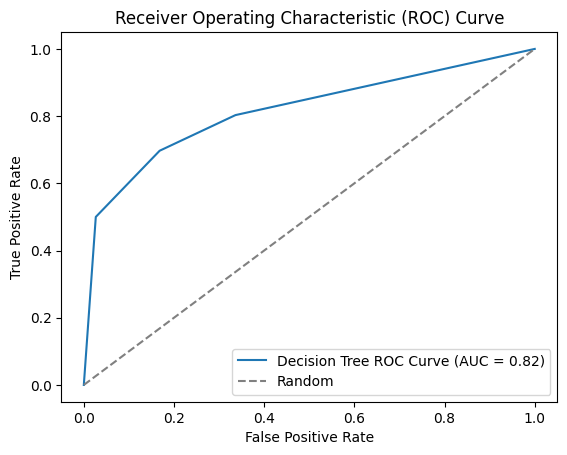

In [76]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Max Depth = 5

In [77]:
DT_Titanic = DecisionTreeClassifier(max_depth=5)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.6447368421052632
Recall: 0.7424242424242424
F1: 0.6901408450704226
ROC AUC: 0.8155001340842049
Accuracy: 0.7541899441340782
Confusion Matrix: 
 [[86 27]
 [17 49]]


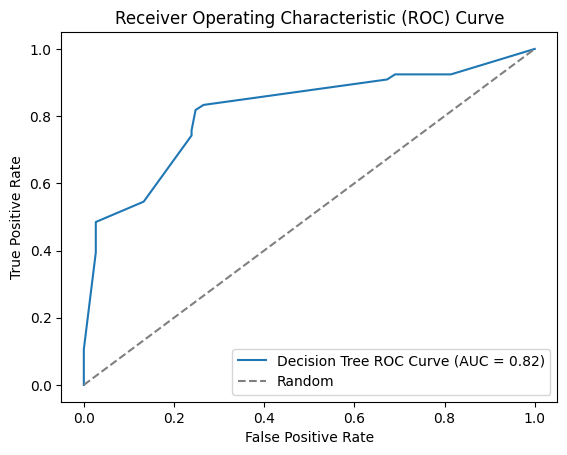

In [79]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Max Depth = 10

In [80]:
DT_Titanic = DecisionTreeClassifier(max_depth=10)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [81]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.6885245901639344
Recall: 0.6363636363636364
F1: 0.6614173228346456
ROC AUC: 0.7280101903995709
Accuracy: 0.7597765363128491
Confusion Matrix: 
 [[94 19]
 [24 42]]


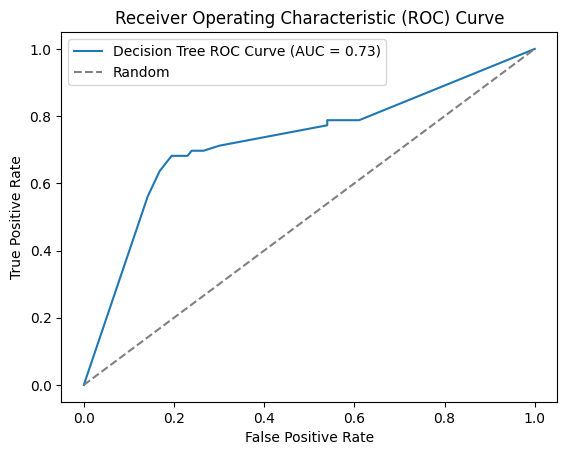

In [82]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Max Decision = 20

In [83]:
DT_Titanic = DecisionTreeClassifier(max_depth=20)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=20)

In [84]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.6571428571428571
Recall: 0.696969696969697
F1: 0.676470588235294
ROC AUC: 0.7422901582193618
Accuracy: 0.7541899441340782
Confusion Matrix: 
 [[89 24]
 [20 46]]


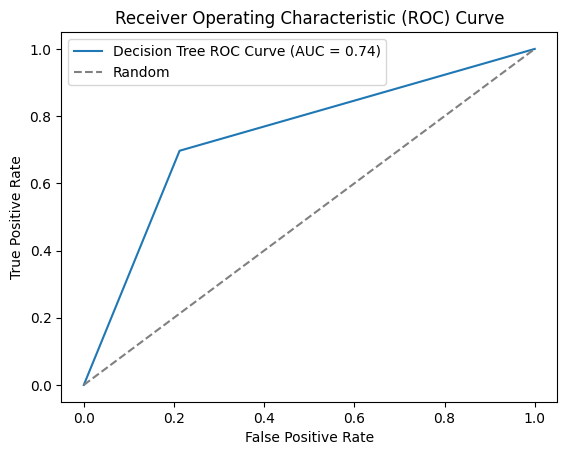

In [85]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Max Depth = 50

In [86]:
DT_Titanic = DecisionTreeClassifier(max_depth=50)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=50)

In [87]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.6865671641791045
Recall: 0.696969696969697
F1: 0.6917293233082707
ROC AUC: 0.7555644945025476
Accuracy: 0.770949720670391
Confusion Matrix: 
 [[92 21]
 [20 46]]


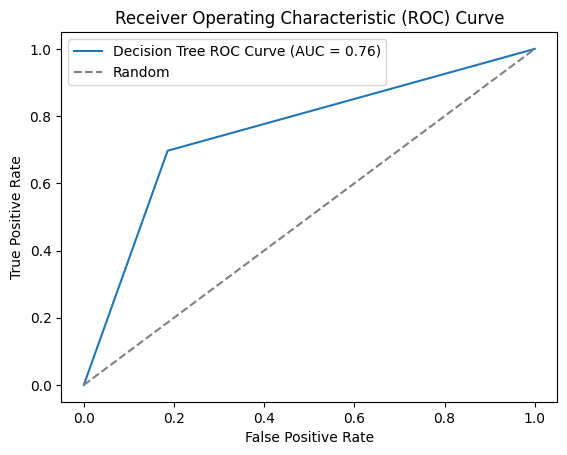

In [88]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Max Depth = 1

In [89]:
DT_Titanic = DecisionTreeClassifier(max_depth=10)
DT_Titanic.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [90]:
DT_pred = DT_Titanic.predict(X_val)

acc = accuracy_score(Y_val, DT_pred)
DT_precision = precision_score(Y_val, DT_pred)
DT_recall = recall_score(Y_val, DT_pred)
DT_f1 = f1_score(Y_val, DT_pred)
DT_probs = DT_Titanic.predict_proba(X_val)[:, 1]
DT_roc_auc = roc_auc_score(Y_val, DT_probs)
DT_fpr, DT_tpr, _ = roc_curve(Y_val, DT_probs)

print("DT Metrics: ")
print(f"Precision: {DT_precision}")
print(f"Recall: {DT_recall}")
print(f"F1: {DT_f1}")
print(f"ROC AUC: {DT_roc_auc}")
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(Y_val, DT_pred)
print(f"Confusion Matrix: \n", conf_matrix)

DT Metrics: 
Precision: 0.6779661016949152
Recall: 0.6060606060606061
F1: 0.64
ROC AUC: 0.7069589702333066
Accuracy: 0.7486033519553073
Confusion Matrix: 
 [[94 19]
 [26 40]]


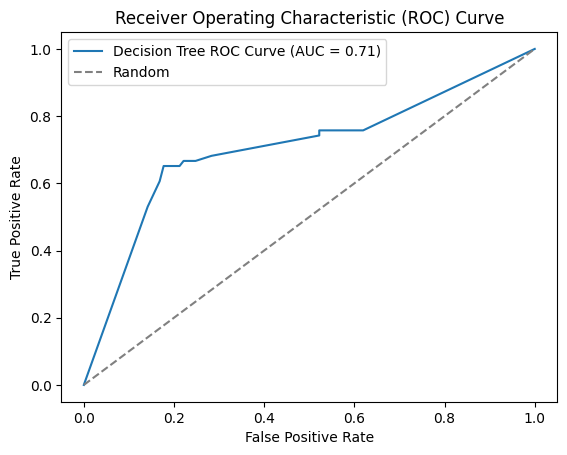

In [91]:
plt.plot(DT_fpr, DT_tpr, label=f'Decision Tree ROC Curve (AUC = {DT_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Test the classifier

In [92]:
submission_data = pd.read_csv("gender_submission.csv")
Y_comp = submission_data["Survived"]

In [93]:
DT_predictions = DT_Titanic.predict(X_test)
acc_test_2 = accuracy_score(Y_comp, DT_predictions)

print(DT_predictions)
print(f"Accuracy: {acc_test_2}")

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0]
Accuracy: 0.7703349282296651


Test DT classifier at max depth = 2

In [94]:
DT_Titanic_2 = DecisionTreeClassifier(max_depth=2)
DT_Titanic_2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [95]:
DT_predictions = DT_Titanic_2.predict(X_test)
acc_test_2 = accuracy_score(Y_comp, DT_predictions)

print(DT_predictions)
print(f"Accuracy: {acc_test_2}")

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy: 1.0


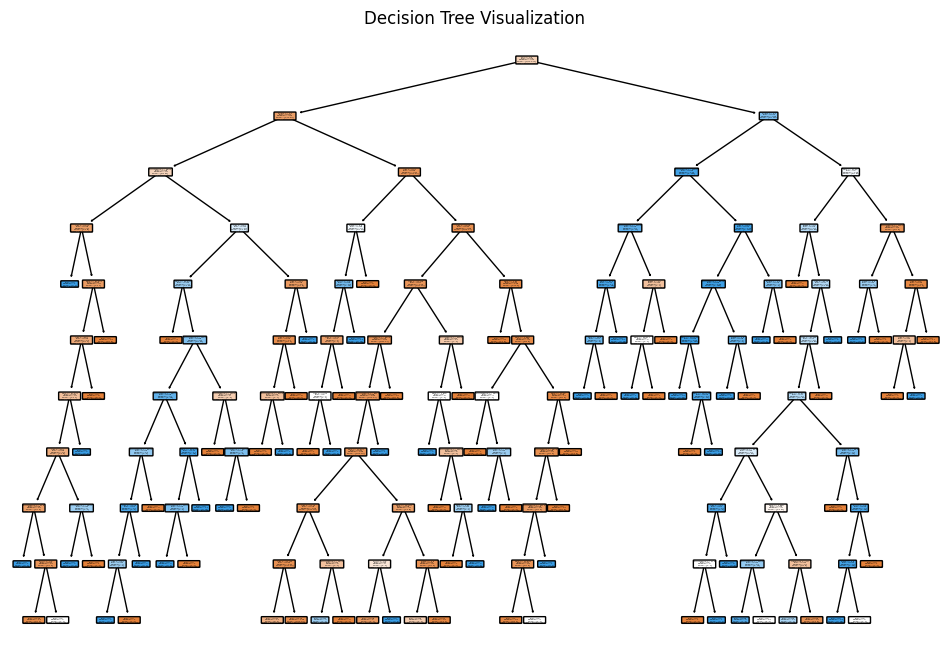

In [97]:
plt.figure(figsize=(12, 8))
plot_tree(DT_Titanic, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()